In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df = pd.read_excel("\\Users\Delll\Documents\data\hnnigeria_nconomy.xlsx")

In [3]:
df.drop(df.index[:9],inplace = True)


In [4]:
df = df.reset_index()


In [5]:
df.drop(columns=['index'], inplace = True)
df

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,1999,0.066,0.0400,0.649,4703.64,10201.81,9062.14,23967.59,248.18,24215.78
1,2000,0.069,0.0400,0.576,4840.97,10962.84,9365.72,25169.54,260.88,25430.42
2,2001,0.189,0.0390,0.531,5024.54,11576.32,10057.76,26658.62,276.69,26935.32
3,2002,0.129,0.0390,0.433,7817.08,11725.42,11202.68,30745.19,319.08,31064.27
4,2003,0.140,0.0390,0.421,8364.83,13151.23,11488.74,33004.80,341.83,33346.62
5,2004,0.150,0.0390,0.355,8888.57,13382.86,13786.30,36057.74,373.64,36431.37
6,2005,0.179,0.0390,0.189,9516.99,13609.76,15252.04,38378.80,398.22,38777.01
7,2006,0.082,0.0390,0.094,10222.47,13342.47,17138.74,40703.68,423.00,41126.68
8,2007,0.054,0.0380,0.081,10958.47,13085.27,19342.14,43385.88,451.51,43837.39
9,2008,0.116,0.0380,0.073,11645.37,12817.79,21856.86,46320.01,482.75,46802.76


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                25 non-null     int64  
 1   Inflation rate                      25 non-null     float64
 2   Unemployment                        25 non-null     float64
 3   Government debt                     25 non-null     float64
 4   Agriculture                         25 non-null     float64
 5   Industry                            25 non-null     float64
 6   Services                            25 non-null     float64
 7   GDP at 2010 Constant Basic Prices   25 non-null     float64
 8   NetTaxesOnProducts                  25 non-null     float64
 9   GDP at 2010 Constant Market Prices  25 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.1 KB


In [7]:
def data_profiling(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col]. dtype
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col, dtype, nunique, null, duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype', 'nunique', 'null', 'duplicates']
    return data_profile_finding

In [8]:
data_profiling(df)

,column,dtype,nunique,null,duplicates
0,Year,int64,25,0,0
1,Inflation rate,float64,24,0,1
2,Unemployment,float64,17,0,8
3,Government debt,float64,24,0,1
4,Agriculture,float64,25,0,0
5,Industry,float64,25,0,0
6,Services,float64,25,0,0
7,GDP at 2010 Constant Basic Prices,float64,25,0,0
8,NetTaxesOnProducts,float64,25,0,0
9,GDP at 2010 Constant Market Prices,float64,25,0,0


In [9]:
president_ranges = {
    (1999,2007): 'Obasanjo',
    (2008,2010): "Yar'Adua",
    (2011,2015): 'Jonathan',
    (2016,2023): 'Buhari',
}

def get_president(Year):
    for (start,end), president in president_ranges.items():
        if start <= Year <= end:
            return president
    return None

In [10]:
df['President'] = df['Year'].apply(get_president)

In [11]:
df

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices,President
0,1999,0.066,0.0400,0.649,4703.64,10201.81,9062.14,23967.59,248.18,24215.78,Obasanjo
1,2000,0.069,0.0400,0.576,4840.97,10962.84,9365.72,25169.54,260.88,25430.42,Obasanjo
2,2001,0.189,0.0390,0.531,5024.54,11576.32,10057.76,26658.62,276.69,26935.32,Obasanjo
3,2002,0.129,0.0390,0.433,7817.08,11725.42,11202.68,30745.19,319.08,31064.27,Obasanjo
4,2003,0.140,0.0390,0.421,8364.83,13151.23,11488.74,33004.80,341.83,33346.62,Obasanjo
5,2004,0.150,0.0390,0.355,8888.57,13382.86,13786.30,36057.74,373.64,36431.37,Obasanjo
6,2005,0.179,0.0390,0.189,9516.99,13609.76,15252.04,38378.80,398.22,38777.01,Obasanjo
7,2006,0.082,0.0390,0.094,10222.47,13342.47,17138.74,40703.68,423.00,41126.68,Obasanjo
8,2007,0.054,0.0380,0.081,10958.47,13085.27,19342.14,43385.88,451.51,43837.39,Obasanjo
9,2008,0.116,0.0380,0.073,11645.37,12817.79,21856.86,46320.01,482.75,46802.76,Yar'Adua


C:\Users\Delll\AppData\Local\Temp\ipykernel_7704\1265629066.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Inflation rate", y="GDP at 2010 Constant Basic Prices", palette="Set2")


Text(0.5, 1.0, 'Relationship between Inflation rate and GDP at 2010 Constant Basic Prices')

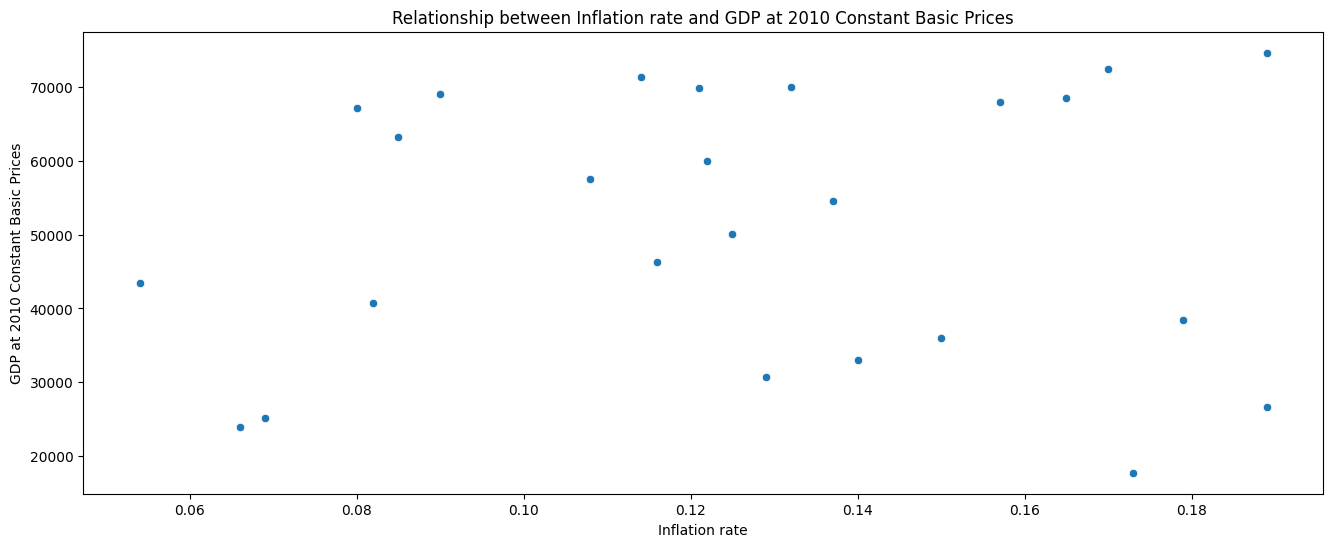

In [12]:
plt.figure(figsize =(16,6))
sns.scatterplot(data=df, x="Inflation rate", y="GDP at 2010 Constant Basic Prices", palette="Set2")
plt.title("Relationship between Inflation rate and GDP at 2010 Constant Basic Prices")

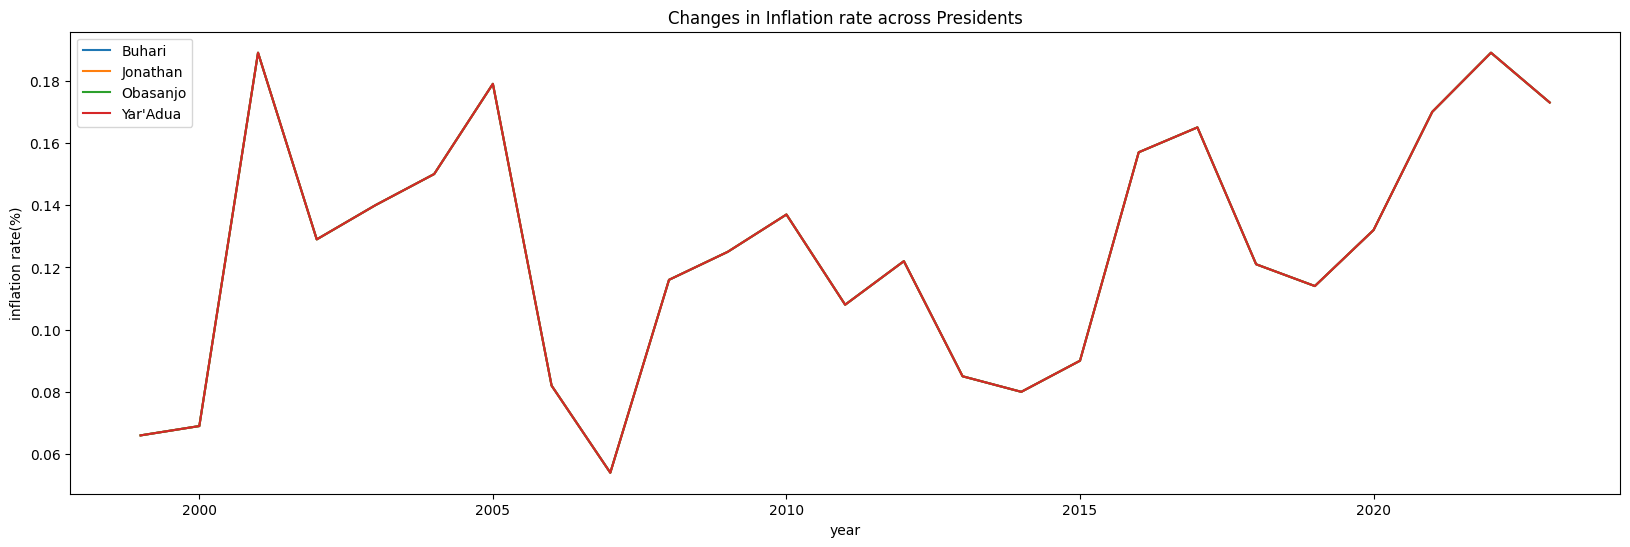

In [13]:
plt.figure(figsize=(20,6))
for president, data in df.groupby('President'):
    plt.plot(df['Year'], df['Inflation rate'], label=president)
plt.title('Changes in Inflation rate across Presidents')
plt.xlabel('year')
plt.ylabel('inflation rate(%)')
plt.legend()
plt.show()
    

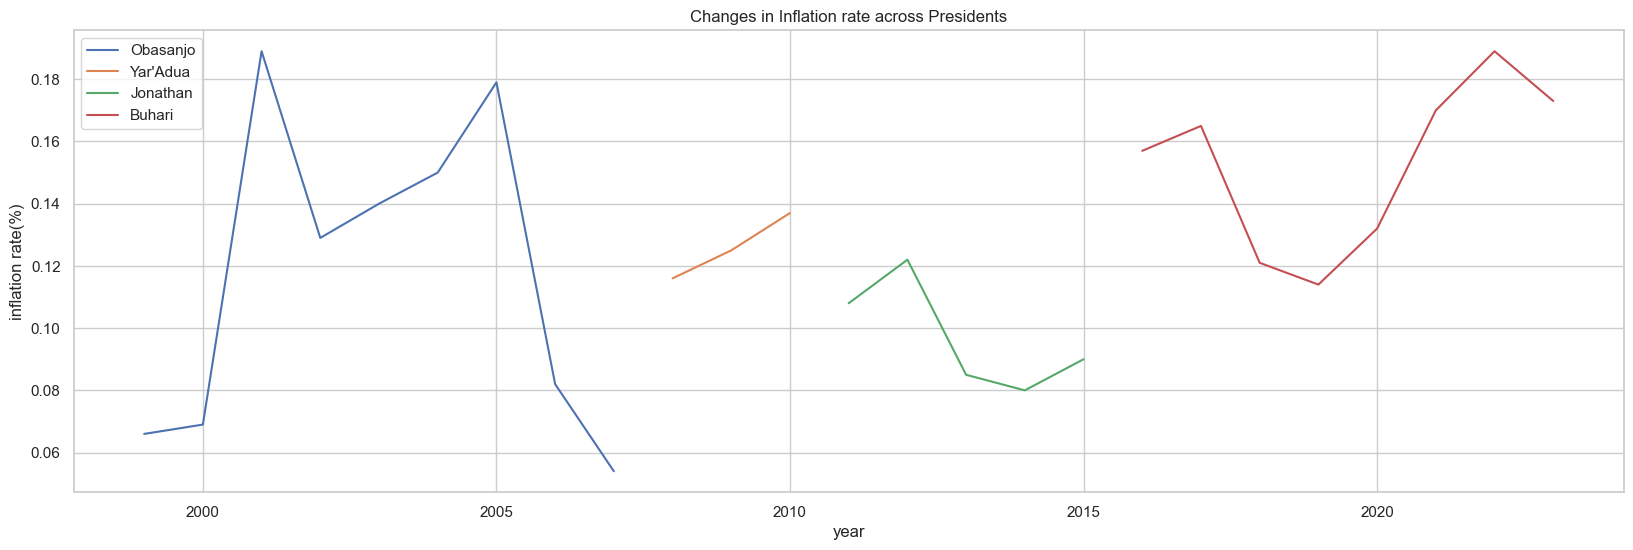

In [14]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(20,6))
sns.lineplot(x = 'Year', y = 'Inflation rate', hue ='President', data = df)
plt.title('Changes in Inflation rate across Presidents')
plt.xlabel('year')
plt.ylabel('inflation rate(%)')
plt.legend()
plt.show()

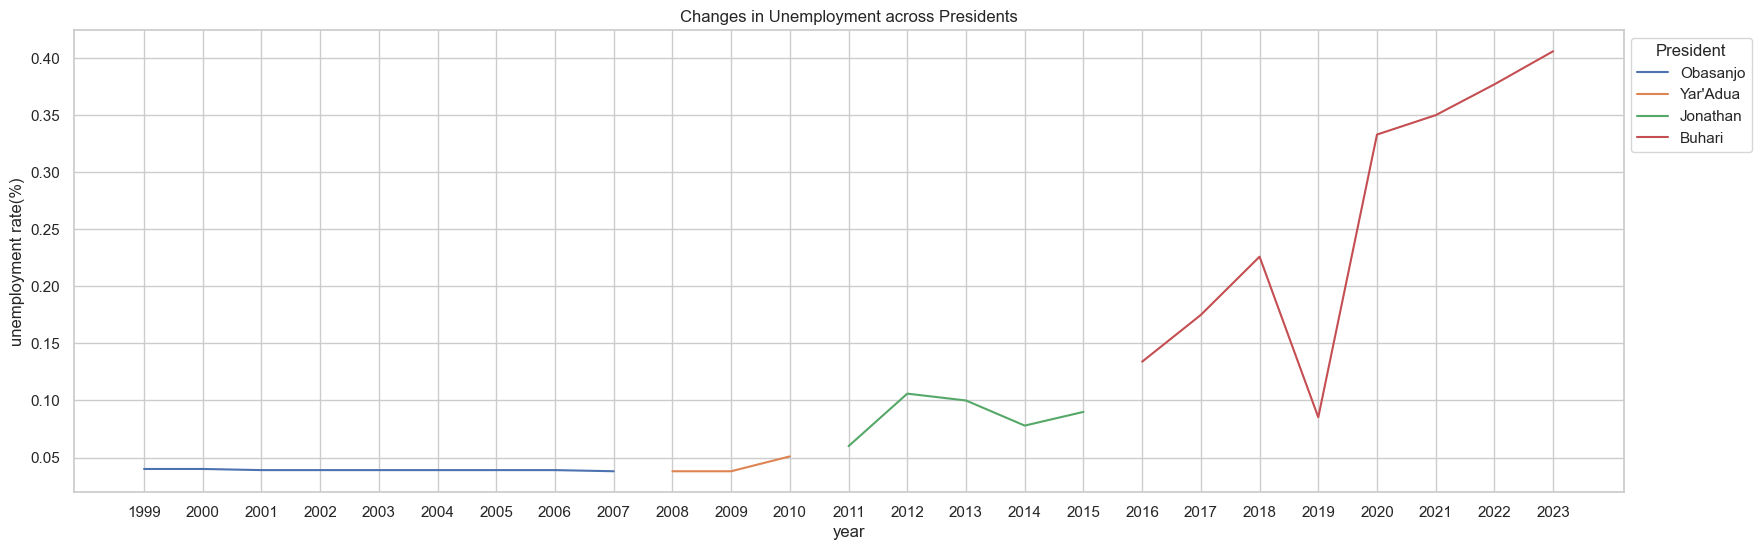

In [15]:
sns.set(style = 'whitegrid')
fig,ax = plt.subplots(figsize=(20,6))
df['Unemployment'] = df.groupby('President')['Unemployment'].transform(lambda x: x.interpolate())
sns.lineplot(x = 'Year', y = 'Unemployment', hue ='President',ax=ax, data = df)
president_years = df.groupby('President')['Year'].unique().apply(lambda x:f"{x.min()}-{x.max()}")
ax.set_xticks(df['Year'].unique())

#setting titles and legends
plt.title('Changes in Unemployment across Presidents')
plt.xlabel('year')
plt.ylabel('unemployment rate(%)')
plt.legend(title= 'President',loc='upper left', bbox_to_anchor= (1,1))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

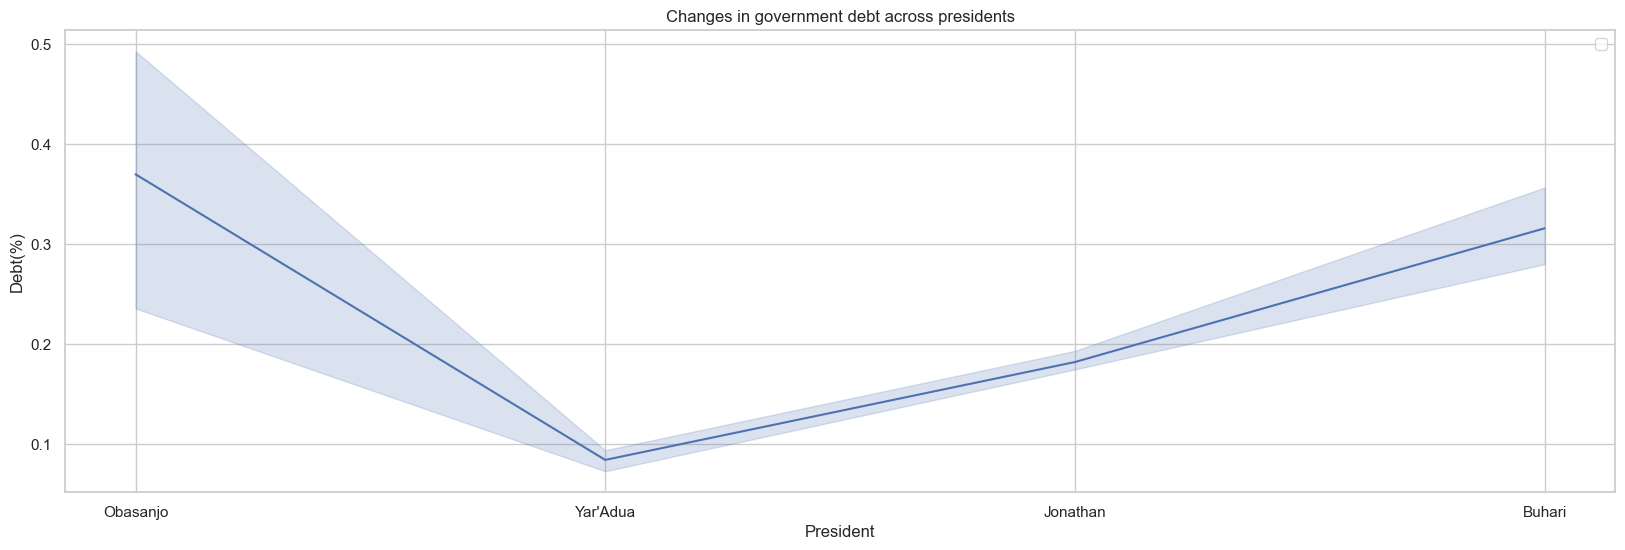

In [16]:
sns.set(style ='whitegrid')
plt.figure(figsize=(20,6))
sns.lineplot(x= 'President', y ='Government debt', data=df)
plt.title('Changes in government debt across presidents')
plt.xlabel('President')
plt.ylabel('Debt(%)')
plt.legend()
plt.show

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
df['Year'] = pd.to_datetime(df['Year'], format= '%Y')
df = df.set_index('Year')

In [19]:
indicator_column ='Inflation rate'
result = seasonal_decompose(df[indicator_column], model ='multiplicative', extrapolate_trend= 'freq')

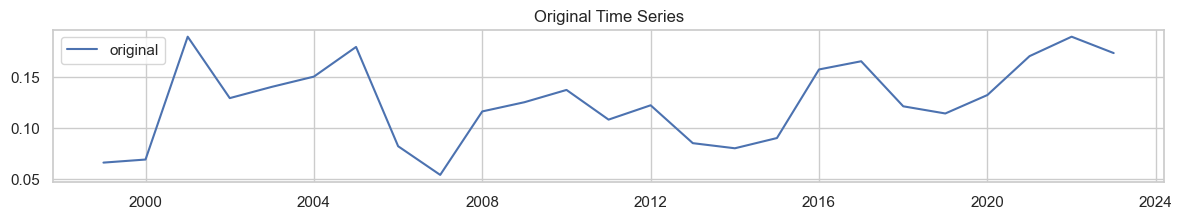

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(4, 1, 1)
plt.plot(df[indicator_column], label ='original')
plt.legend(loc= 'upper left')
plt.title('Original Time Series')
plt.tight_layout()
plt.show()


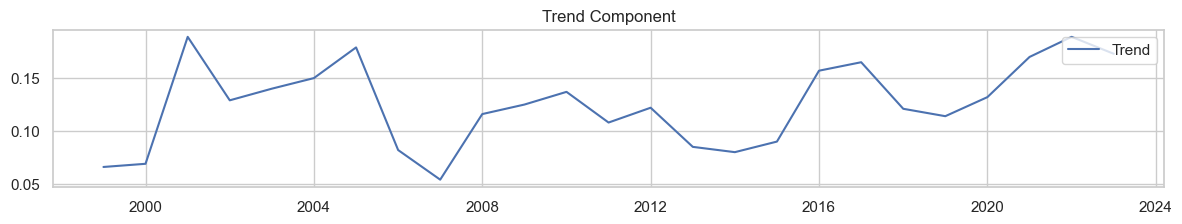

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,2)
plt.plot(result.trend, label ='Trend')
plt.legend(loc='upper right')
plt.title('Trend Component')
plt.tight_layout()
plt.show()

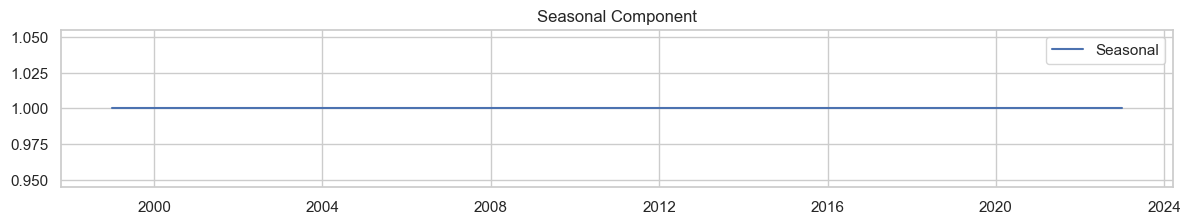

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc= 'upper right')
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

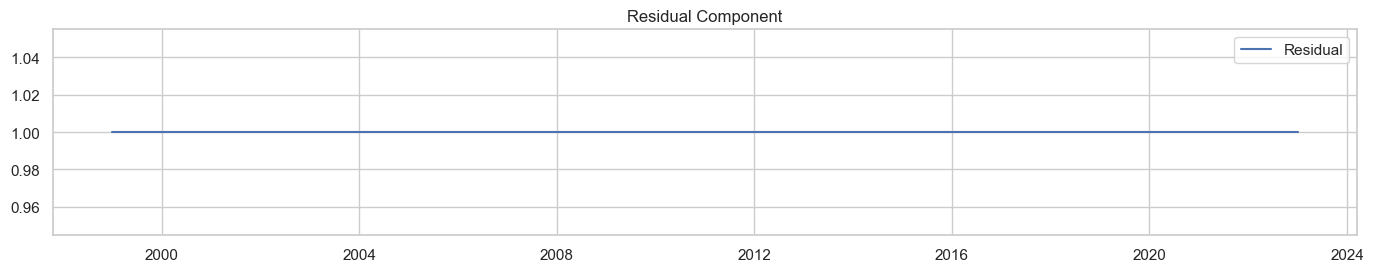

In [23]:
plt.figure(figsize=(14,10))
plt.subplot(4,1,4)
plt.plot(result.resid, label = 'Residual')
plt.legend(loc ='upper right')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [24]:
avg_gdp_per_president = df.groupby('President')['GDP at 2010 Constant Basic Prices'].mean()

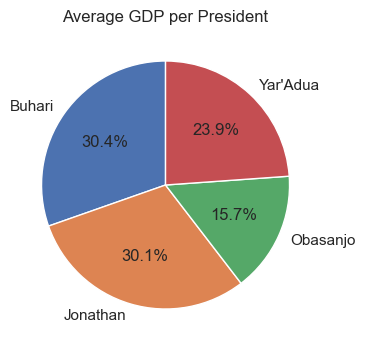

In [25]:
plt.figure(figsize= (4,8))
plt.pie(avg_gdp_per_president, labels= avg_gdp_per_president.index, autopct= '%1.1f%%', startangle=90)
plt.title('Average GDP per President')
plt.show()

In [26]:
numeric_columns = df.select_dtypes(include = 'number')
correlation_matrix = numeric_columns.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

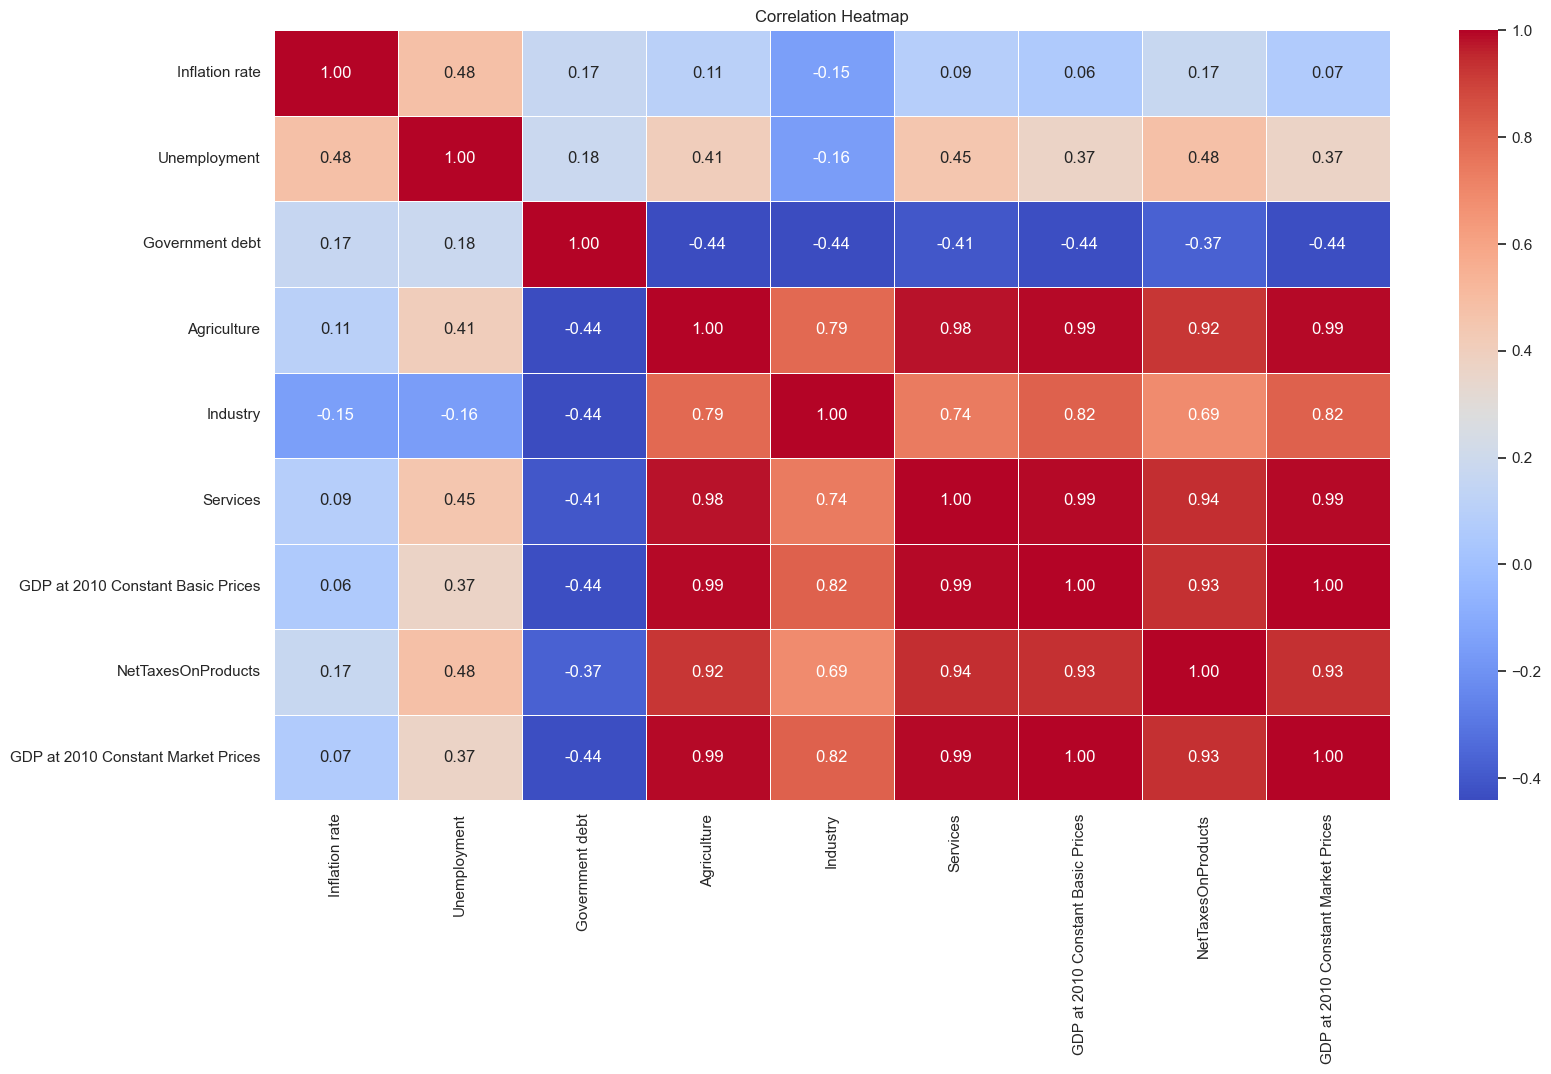

In [27]:
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')


In [28]:
import statsmodels.api as sm

In [29]:
df_regression = df[['GDP at 2010 Constant Basic Prices', 'Inflation rate', 'Unemployment', 'Government debt' ]].dropna()
x= sm.add_constant(df_regression[['Inflation rate', 'Unemployment', 'Government debt']])
y = df_regression['GDP at 2010 Constant Basic Prices']
model = sm.OLS(y, x).fit()

In [30]:
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     GDP at 2010 Constant Basic Prices   R-squared:                       0.400
Model:                                           OLS   Adj. R-squared:                  0.314
Method:                                Least Squares   F-statistic:                     4.658
Date:                               Tue, 02 Jan 2024   Prob (F-statistic):             0.0120
Time:                                       12:17:29   Log-Likelihood:                -273.91
No. Observations:                                 25   AIC:                             555.8
Df Residuals:                                     21   BIC:                             560.7
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                      coef    std err          t      P>|t| 

In [31]:
residuals = model.resid
predicted= model.fittedvalues
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

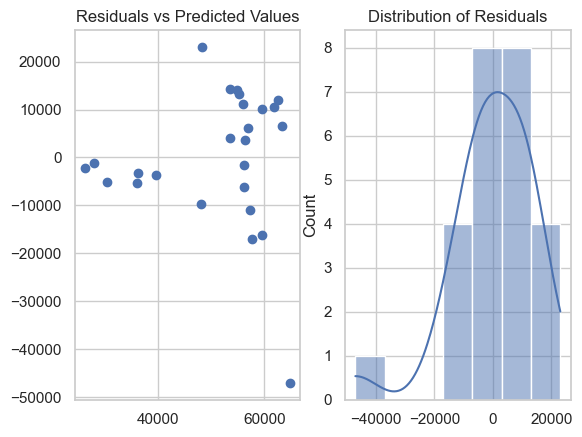

In [32]:
plt.subplot(1,2,1)
plt.scatter(predicted, residuals)
plt.title('Residuals vs Predicted Values')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')

plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [34]:
df_regression= df[['GDP at 2010 Constant Basic Prices', 'Inflation rate', 'Unemployment', 'Government debt']].dropna()
x = df_regression[['Inflation rate', 'Unemployment', 'Government debt']]
y = df_regression['GDP at 2010 Constant Basic Prices']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

Mean Squared Error on test set: 187039336.73612732


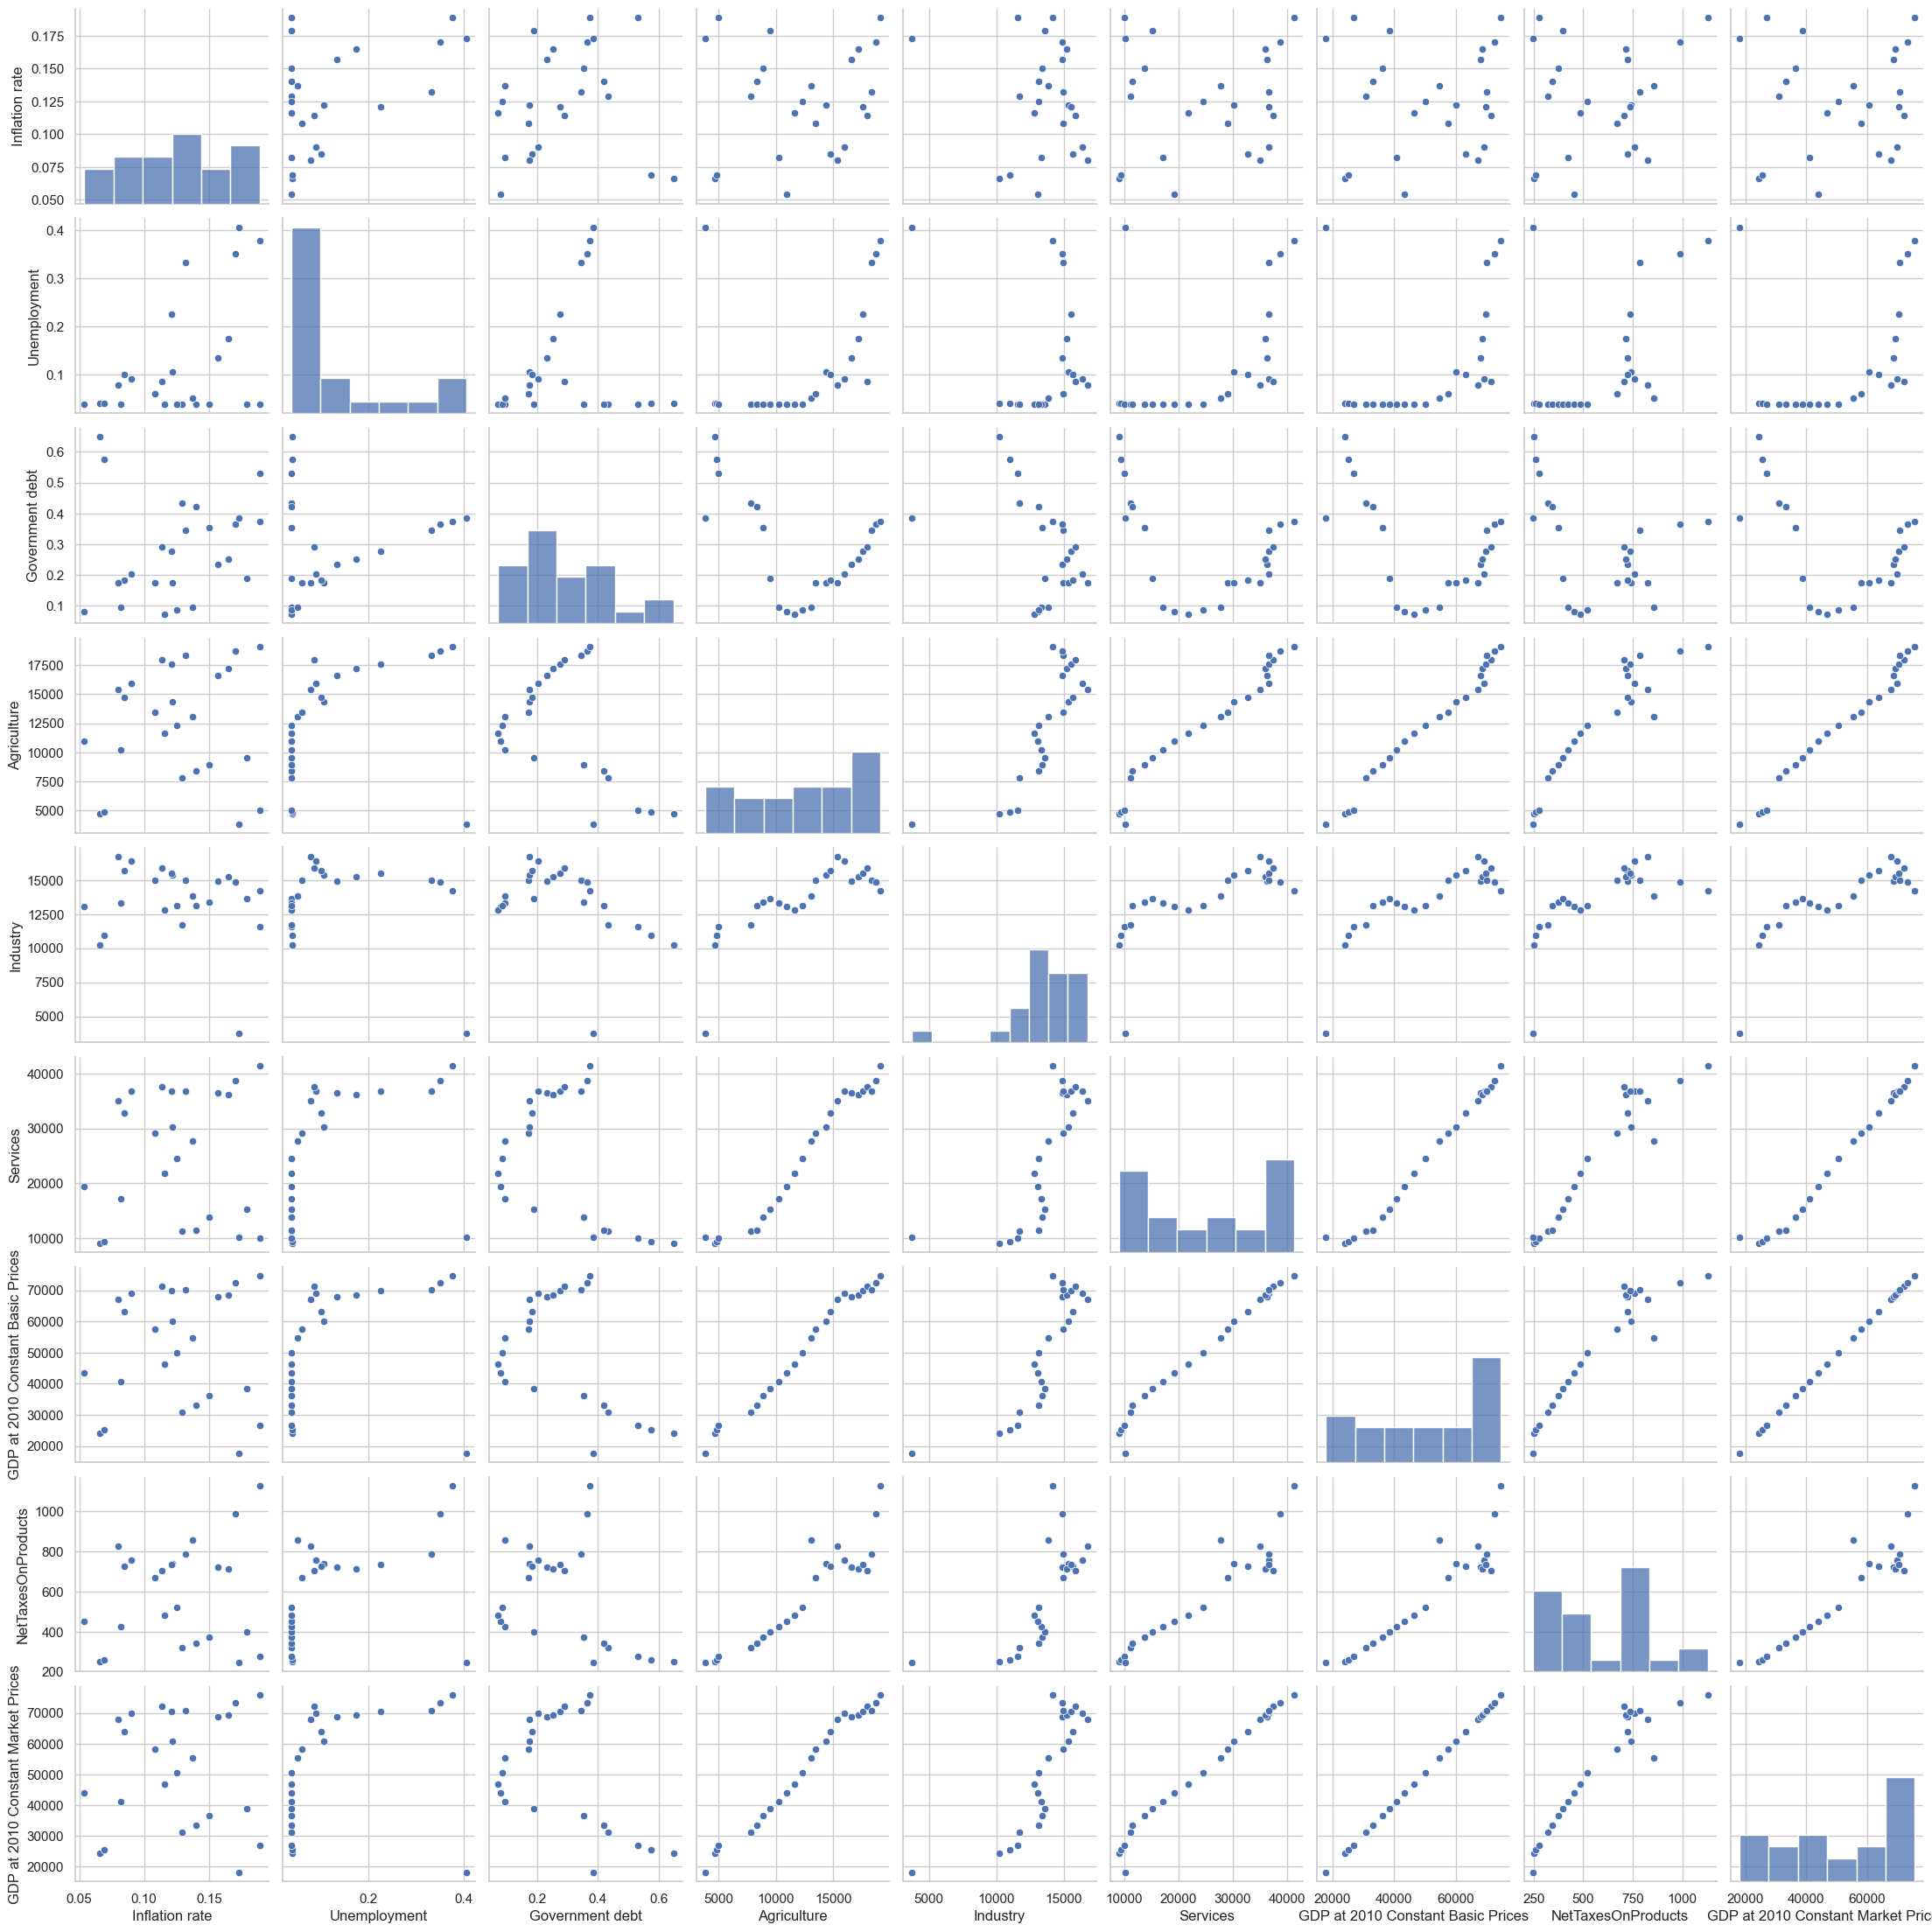

In [36]:
sns.pairplot(df)
plt.show()